In [1]:
#Importing libraries necessary for this project
import pandas as pd
import numpy as np
from IPython.display import display #helps display the data frames using the display() function 
from time import time
import matplotlib.pyplot as plt


#Pretty display for notebooks
%matplotlib inline

#reads the dataset file 
data=pd.read_csv("pima-indians-diabetes.csv")

#displaying the top 5 rows of the dataset
display(data.head())

,preg_cnt,glu_conc,dia_bp,tris_skin,ser_insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
#No of rows in the dataset
len(data)

768

In [3]:
#Important statistical parameters of the dataset for every feature
data.describe()

,preg_cnt,glu_conc,dia_bp,tris_skin,ser_insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
#binary classification of the class variable, distinguishing total no of positive and negative values respectively
positive=0
negative=0
for i in data['diabetes']:
    if i==0:
        negative+=1
    if i==1:
        positive+=1

#printing the results        
print 'People with Diabetes :{}'.format(positive)
print 'People who do not have Diabetes:{}'.format(negative)

People with Diabetes :268
People who do not have Diabetes:500


In [5]:
#having zero values in the below features is an abnormality and hence are missing values, therefore converted to NaN

#using data frames replace function to replace 0 by the NaN in the column axis 
data['ser_insulin']=data['ser_insulin'].replace(0,"NaN",axis=1)
data['bmi']=data['bmi'].replace(0,"NaN",axis=1)
data['glu_conc']=data['glu_conc'].replace(0,"NaN",axis=1)
data['tris_skin']=data['tris_skin'].replace(0,"NaN",axis=1)
data['dia_bp']=data['dia_bp'].replace(0,"NaN",axis=1)

#after replacing zeroes wtih NaN in the aboe features, the top 5 rows of the dataset is displayed
display(data.head())
len(data)


/home/tensor/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:3416: UserWarning: the "axis" argument is deprecated and will be removed inv0.13; this argument has no effect
  warn('the "axis" argument is deprecated and will be removed in'


,preg_cnt,glu_conc,dia_bp,tris_skin,ser_insulin,bmi,dpf,age,diabetes
0,6,148,72,35,NaN,33.6,0.627,50,1
1,1,85,66,29,NaN,26.6,0.351,31,0
2,8,183,64,NaN,NaN,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


768

In [6]:
#calculation no of NaN in every feature one by one and printing them out
h=0
for x in range(len(data['glu_conc'])):
    if data['glu_conc'][x]=="NaN":
        h+=1
print "Missing values in glucose concentration:{}" .format(h)       
i=0
for x in range(len(data['dia_bp'])):
    if data['dia_bp'][x]=="NaN":
        i+=1
print "Missing Values in DiastoliC Blood Pressure:{}".format(i) 

k=0
for x in range(len(data['tris_skin'])):
    if data['tris_skin'][x]=="NaN":
        k+=1
print "Missing values in Triceps skin thickness:{}".format(k)   

l=0
for x in range(len(data['ser_insulin'])):
    if data['ser_insulin'][x]=="NaN":
        l+=1
print "Missing values in 2-hour serum insulin:{}".format(l)  

m=0
for x in range(len(data['bmi'])):
    if data['bmi'][x]=='NaN':
        m+=1
print "Missing values in body mass index:{}".format(m)        

Missing values in glucose concentration:5
Missing Values in DiastoliC Blood Pressure:35
Missing values in Triceps skin thickness:227
Missing values in 2-hour serum insulin:374
Missing values in body mass index:11


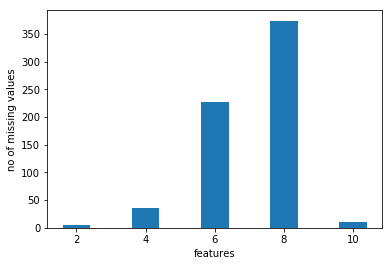

In [7]:
#plotting the missing values in the features with missing values
x1=[2,4,6,8,10]
y1=[5,35,227,374,11]
plt.bar(x1,y1,label='missing values')
plt.xlabel("features")
plt.ylabel("no of missing values")
plt.show()

In [8]:
#creating separeate variables for features and labels by dropping the diabetes(label)and storing it in y

X=data.drop('diabetes',axis=1)
y=data['diabetes']

#confirming by printing that the separation was successful
print X.head()
print y.head()

   preg_cnt glu_conc dia_bp tris_skin ser_insulin   bmi    dpf  age
0         6      148     72        35         NaN  33.6  0.627   50
1         1       85     66        29         NaN  26.6  0.351   31
2         8      183     64       NaN         NaN  23.3  0.672   32
3         1       89     66        23          94  28.1  0.167   21
4         0      137     40        35         168  43.1  2.288   33
0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64


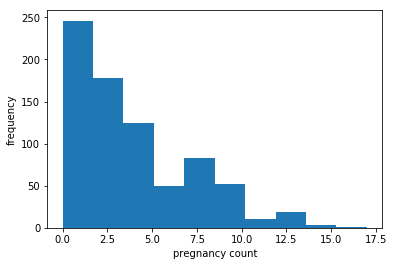

In [9]:
#plotting the histogram of pregnancy count, checking which no occurs more often, the overall distribution of this feature
plt.hist(data['preg_cnt'])

#labelling the axis of x and y 
plt.xlabel("pregnancy count")
plt.ylabel("frequency")



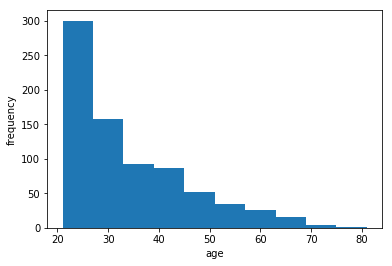

In [10]:
#Plotting the histogram of the age feature
plt.hist(data['age'])

#labelling the axis of x and y
plt.xlabel('age')
plt.ylabel("frequency")

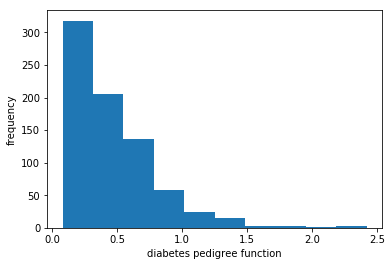

In [11]:
#Plotting the histogram of diabetes pedigree function
plt.hist(data['dpf'])

#labelling the axis of x and y
plt.xlabel("diabetes pedigree function")
plt.ylabel("frequency")

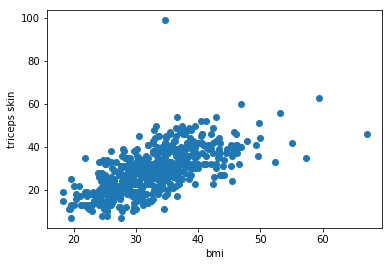

In [12]:
#scatterplot of bmi and triceps skin feature to check for correlation
plt.scatter(data['bmi'],data['tris_skin'])
plt.xlabel("bmi")
plt.ylabel("triceps skin")


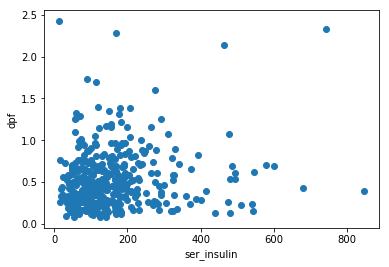

In [13]:
#scatterplot of ser-insulin and dpf to check for correlation
plt.scatter(data['ser_insulin'],data['dpf'])
plt.xlabel("ser_insulin")
plt.ylabel("dpf")

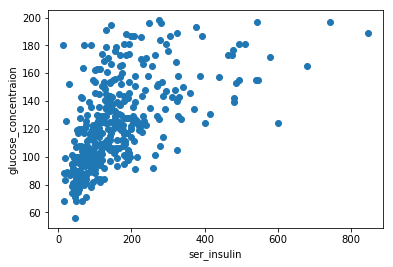

In [14]:
#scatterplot of glucose concentration and ser_insulin
plt.scatter(data['ser_insulin'],data['glu_conc'])
plt.xlabel("ser_insulin")
plt.ylabel("glucose_concentraion")

In [15]:
#replacing the NaN values in the features with their respective medians or means
data['ser_insulin']=data['ser_insulin'].replace("NaN",30.5,axis=1)#replaced by median as too many missing values 
data['bmi']=data['bmi'].replace("NaN",31.992578,axis=1)#replaced by median or mean, both are almost equal
data['glu_conc']=data['glu_conc'].replace("NaN",120.8945,axis=1)#replaced by mean
data['tris_skin']=data['tris_skin'].replace("NaN",23,axis=1)#replaced by median as too many missing values
data['dia_bp']=data['dia_bp'].replace("NaN",72,axis=1)#replaced by median, considerale missing values

#confirming the changes by visualizing the first 5 rows
data.head()

,preg_cnt,glu_conc,dia_bp,tris_skin,ser_insulin,bmi,dpf,age,diabetes
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


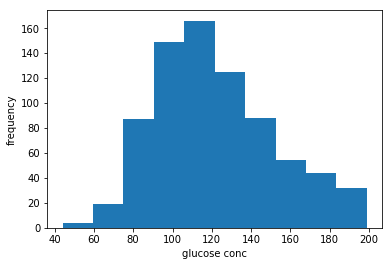

In [16]:
#after replacing NaN values, histogram of glucose concentration is plotted
plt.hist(data['glu_conc'])

#labelling the axis of x and y
plt.xlabel("glucose conc")
plt.ylabel("frequency")

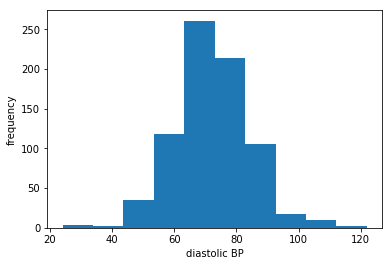

In [17]:
#after replacing by median, scatterplot of diastolic bp is plotted
plt.hist(data['dia_bp'])

#labelling the axis of x and y
plt.xlabel("diastolic BP")
plt.ylabel("frequency")

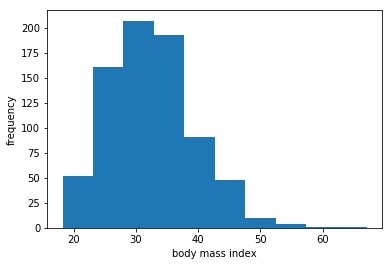

In [18]:
plt.hist(data['bmi'])
plt.xlabel("body mass index")
plt.ylabel("frequency")

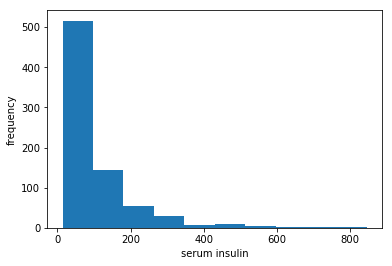

In [19]:
#plotting a scatterplot of ser_insulin after replacing the missing values with its median
plt.hist(data['ser_insulin'])
plt.xlabel("serum insulin")
plt.ylabel("frequency")

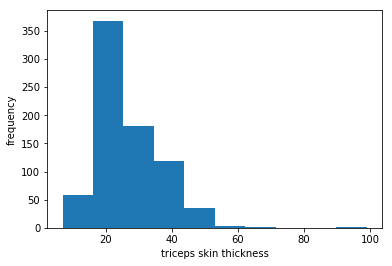

In [20]:
#plotting scatterplot of triceps skin after replacing missing values with its median
plt.hist(data["tris_skin"])
plt.xlabel("triceps skin thickness")
plt.ylabel("frequency")

In [21]:
#Importing preprocessing library to scale the dataset features
from sklearn.preprocessing import MinMaxScaler

#creating the scaler object
scaler=MinMaxScaler()

#making a list of all the features to be scaled
features=['preg_cnt','dia_bp','bmi','dpf','tris_skin','glu_conc','ser_insulin','age']

#executing the scaler function and storing it in the features dataframe X
X[features]=scaler.fit_transform(data[features])

#confirming the changes by displaying the result
X.head()



,preg_cnt,glu_conc,dia_bp,tris_skin,ser_insulin,bmi,dpf,age
0,0.352941,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.058824,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.470588,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.058824,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.000000,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000


In [22]:
#looking at correlations between diff features and displaying it
print X.corr()

             preg_cnt  glu_conc    dia_bp  tris_skin  ser_insulin       bmi  \
preg_cnt     1.000000  0.127964  0.208615   0.032568    -0.055697  0.021546   
glu_conc     0.127964  1.000000  0.218623   0.172361     0.357081  0.231478   
dia_bp       0.208615  0.218623  1.000000   0.147809    -0.028721  0.281129   
tris_skin    0.032568  0.172361  0.147809   1.000000     0.238188  0.546958   
ser_insulin -0.055697  0.357081 -0.028721   0.238188     1.000000  0.189031   
bmi          0.021546  0.231478  0.281129   0.546958     0.189031  1.000000   
dpf         -0.033523  0.137106 -0.002378   0.142977     0.178029  0.153508   
age          0.544341  0.266600  0.324915   0.054514    -0.015413  0.025748   

                  dpf       age  
preg_cnt    -0.033523  0.544341  
glu_conc     0.137106  0.266600  
dia_bp      -0.002378  0.324915  
tris_skin    0.142977  0.054514  
ser_insulin  0.178029 -0.015413  
bmi          0.153508  0.025748  
dpf          1.000000  0.033561  
age          0.0

In [23]:
#Importing necessary metrics and classifiers to perform and evaluate the machine learning results
from sklearn.metrics import f1_score,confusion_matrix

#Import cross validation to split the data into train and test sets 
from sklearn.cross_validation import train_test_split

#Importing ensemble classifiers
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,ExtraTreesClassifier
#importing support vector machine
from sklearn.svm import SVC
#importing logistic regression
from sklearn.linear_model import LogisticRegression
#importing decision trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#splitting the data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

#confirming the shapes of train and test sets
print X_train.shape
print X_test.shape

#making the classifier object and tuning its parameters
clf=ExtraTreesClassifier(n_estimators=100,min_samples_split=6,max_depth=8,random_state=6)
#Fitting the classifier on training set
start_clf=time()
clf.fit(X_train,y_train)
end_clf=time()
#Predicting the test set using the classifier
start_clf_pred=time()
y_pred=clf.predict(X_test)
end_clf_pred=time()

print "Training time:{}".format(end_clf-start_clf)#Displaying the training time
print "Predicting time:{}".format(end_clf_pred-start_clf_pred)#Displaying the predicting time
print confusion_matrix(y_test,y_pred)#displaying the confusion matrix of the results 
print "F1_score:{}".format(f1_score(y_test,y_pred))#displaying the f1_score of the results
print"Accuracy score:{}".format(clf.score(X_test,y_test))#displaying the accuracy score of the results




/home/tensor/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(537, 8)
(231, 8)
Training time:1.96691513062
Predicting time:0.648524999619
[[145  12]
 [ 38  36]]
F1_score:0.590163934426
Accuracy score:0.78354978355


In [24]:

#creating another machine learning classifier object
clf1=GradientBoostingClassifier(learning_rate=0.5,max_depth=6,min_samples_split=9,random_state=0)

#Fitting the classifier object on training set
start_clf1=time()
clf1.fit(X_train,y_train)
end_clf1=time()

#performing predictions on test set
start_clf1_pred=time()
y_pred1=clf1.predict(X_test)
end_clf1_pred=time()

print "Training time:{}".format(end_clf1-start_clf1)#Displaying the training time
print "Predicting time:{}".format(end_clf1_pred-start_clf1_pred)#Displaying the predicting time
print(confusion_matrix(y_test,y_pred1))#displaying the confusion matrix of the results
importances=(clf1.feature_importances_)
print "Important features:{}".format(importances) #displaying the important features according to the classfieir and their scores

print "Accuracy score:{}".format(clf1.score(X_test,y_test))#displaying the accuracy score of the results


print "f1_score:{}".format(f1_score(y_test,y_pred1))#displaying the f1_score of the results

Training time:0.632729053497
Predicting time:0.00326299667358
[[133  24]
 [ 23  51]]
Important features:[ 0.05907009  0.12545744  0.05737576  0.05453035  0.05123261  0.15274376
  0.16322791  0.09636208]
Accuracy score:0.796536796537
f1_score:0.684563758389


In [25]:
#same procedure as above classifier for Logistic regression
clf2=LogisticRegression(random_state=6)
start_clf2=time()
clf2.fit(X_train,y_train)
end_clf2=time()

start_clf2_pred=time()
y_pred2=clf2.predict(X_test)
end_clf2_pred=time()



print "training time:{}".format(end_clf2-start_clf2)
print "predicting time:{}".format(end_clf2_pred-start_clf2_pred)

print "Accuracy score:{}".format(clf2.score(X_test,y_test))
print confusion_matrix(y_test,y_pred2)
print "f1_score:{}".format(f1_score(y_test,y_pred2))


training time:0.00981783866882
predicting time:0.00862884521484
Accuracy score:0.774891774892
[[144  13]
 [ 39  35]]
f1_score:0.573770491803


In [26]:
#repeating the same procedures as above
clf3=DecisionTreeClassifier(random_state=0)

start_clf3=time()
clf3.fit(X_train,y_train)
end_clf3=time()

start_clf3_pred=time()
y_pred3=clf2.predict(X_test)
end_clf3_pred=time()

print "Training time:{}".format(end_clf3-start_clf3)
print "Predicting time:{}".format(end_clf3_pred-start_clf3_pred)
print "Acccuaracy score:{}".format(clf2.score(X_test,y_test))

print confusion_matrix(y_test,y_pred3)

print "F1_score:{}".format(f1_score(y_test,y_pred3))
print "Important features:{}".format(clf3.feature_importances_)

Training time:0.00628685951233
Predicting time:0.000731945037842
Acccuaracy score:0.774891774892
[[144  13]
 [ 39  35]]
F1_score:0.573770491803
Important features:[ 0.04950104  0.28094256  0.10384884  0.03955937  0.04067314  0.1865405
  0.14575618  0.15317838]


In [27]:
#importing stacking library to form a combination classifier,Classifiers showing the best accuracies are chosen
from stacked_generalizer import StackedGeneralizer

#no of cross validation folds in the data
n_folds=9
VERBOSE=True



# hold out 30 percent of data for testing accuracy
train_prct = 0.7
n_train = int(round(X.shape[0]*train_prct))

# define base models
base_models = [clf,clf1,clf2,clf3]
# define blending model
blending_model = clf

# initialize multi-stage model
sg = StackedGeneralizer(base_models, blending_model, 
                        n_folds=n_folds, verbose=VERBOSE)

# fit model
start_time=time()
sg.fit(X_train.values,y_train.values)
end_time=time()
# test accuracy
start_pred=time()
pred = sg.predict(X_test)
end_pred=time()
pred_classes = [np.argmax(p) for p in pred]
_ = sg.evaluate(y_test, pred_classes)
print "Training time:{}".format(end_time-start_time)
print"Prediction Time:{}".format(end_pred-start_pred)


Fitting Base Models...
Fitting model 01: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=8, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=6,
           verbose=0, warm_start=False)
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fitting model 02: GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=9, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)
Fold 1
Fold 2
Fold 3
Fold 4
Fold 5
Fold 6
Fold 7
Fold 8
Fold 9
Fitting model 0

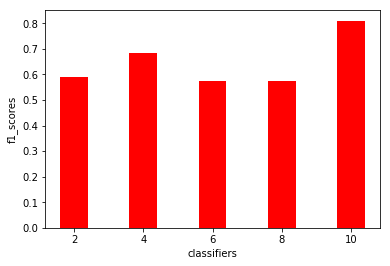

In [28]:
#plotting and comparing the f1 scores of the classifiers and the stacking model
lab=[2,4,6,8,10]
f1scores=[0.590163934426,0.684563758389,0.573770491803,0.573770491803,0.81]
plt.bar(lab,f1scores,color='red')
plt.xlabel("classifiers")
plt.ylabel("f1_scores")
plt.show()